In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ccdata = pd.read_csv("/content/drive/MyDrive/CC GENERAL.csv")

# **EDA**

In [ ]:
ccdata.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [ ]:
ccdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [ ]:
ccdata.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [ ]:
ccdata.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
ccdata['MINIMUM_PAYMENTS'].fillna(ccdata['MINIMUM_PAYMENTS'].mean(),inplace=True)
ccdata['CREDIT_LIMIT'].fillna(ccdata['CREDIT_LIMIT'].mean(),inplace=True)

In [ ]:
ccdata.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [ ]:
ccdata.drop('CUST_ID',axis=1, inplace=True)

In [ ]:
ccdata.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12



# **Visualization**

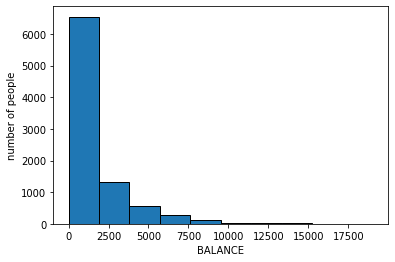

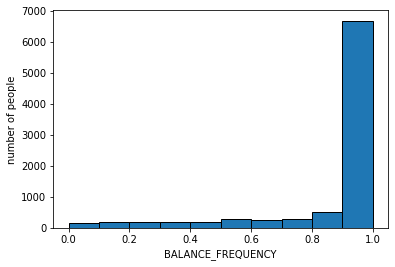

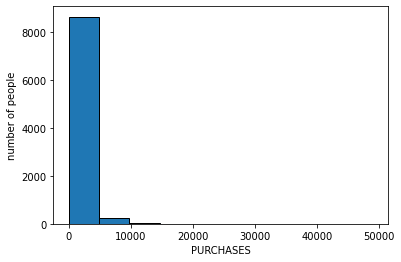

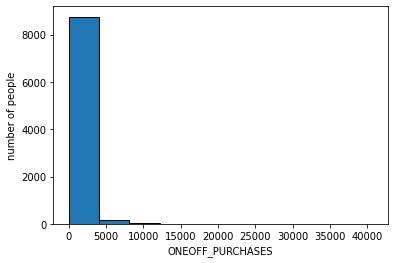

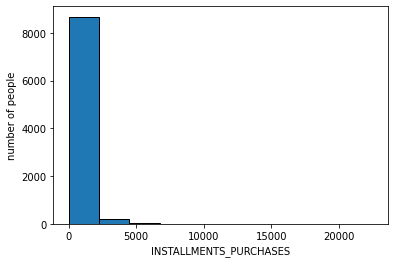

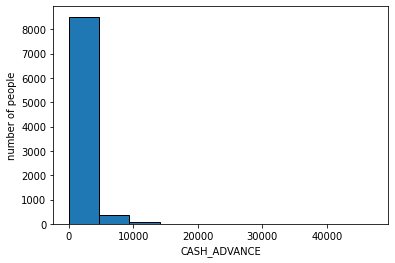

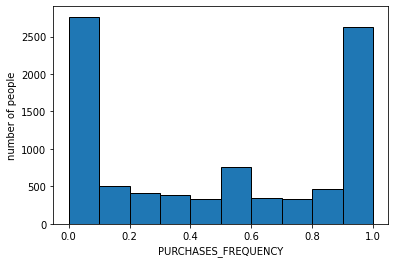

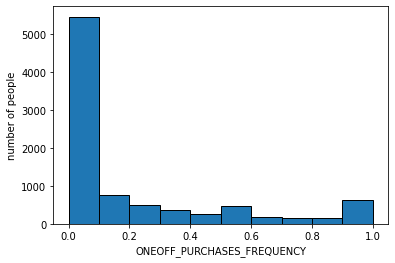

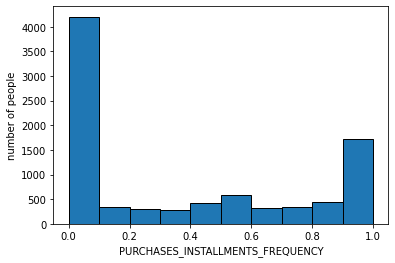

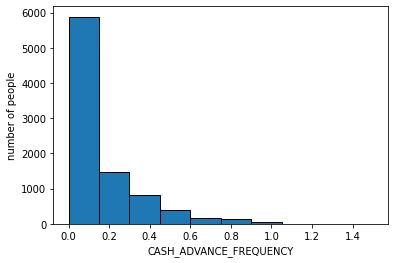

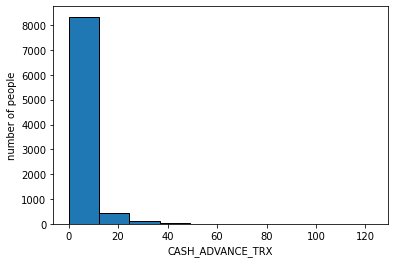

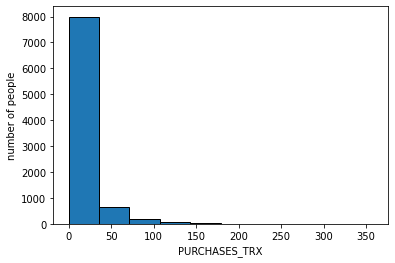

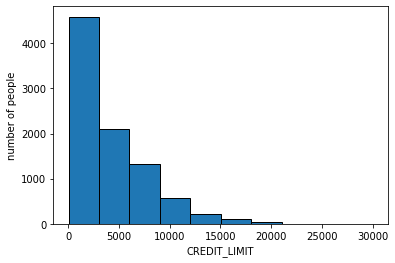

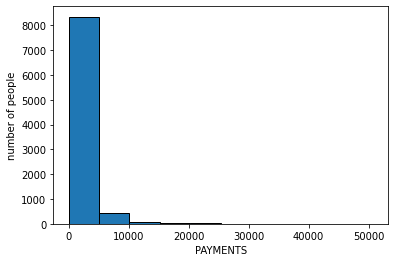

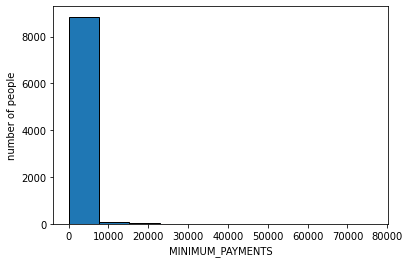

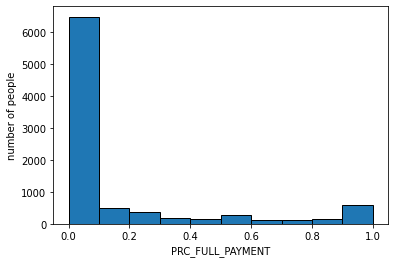

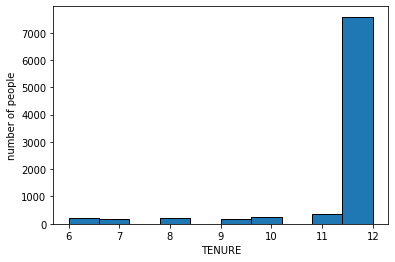

In [ ]:
for i in ccdata.loc[:, ccdata.columns]:
    plt.hist(ccdata[i], edgecolor='black')
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('number of people')
    plt.show()

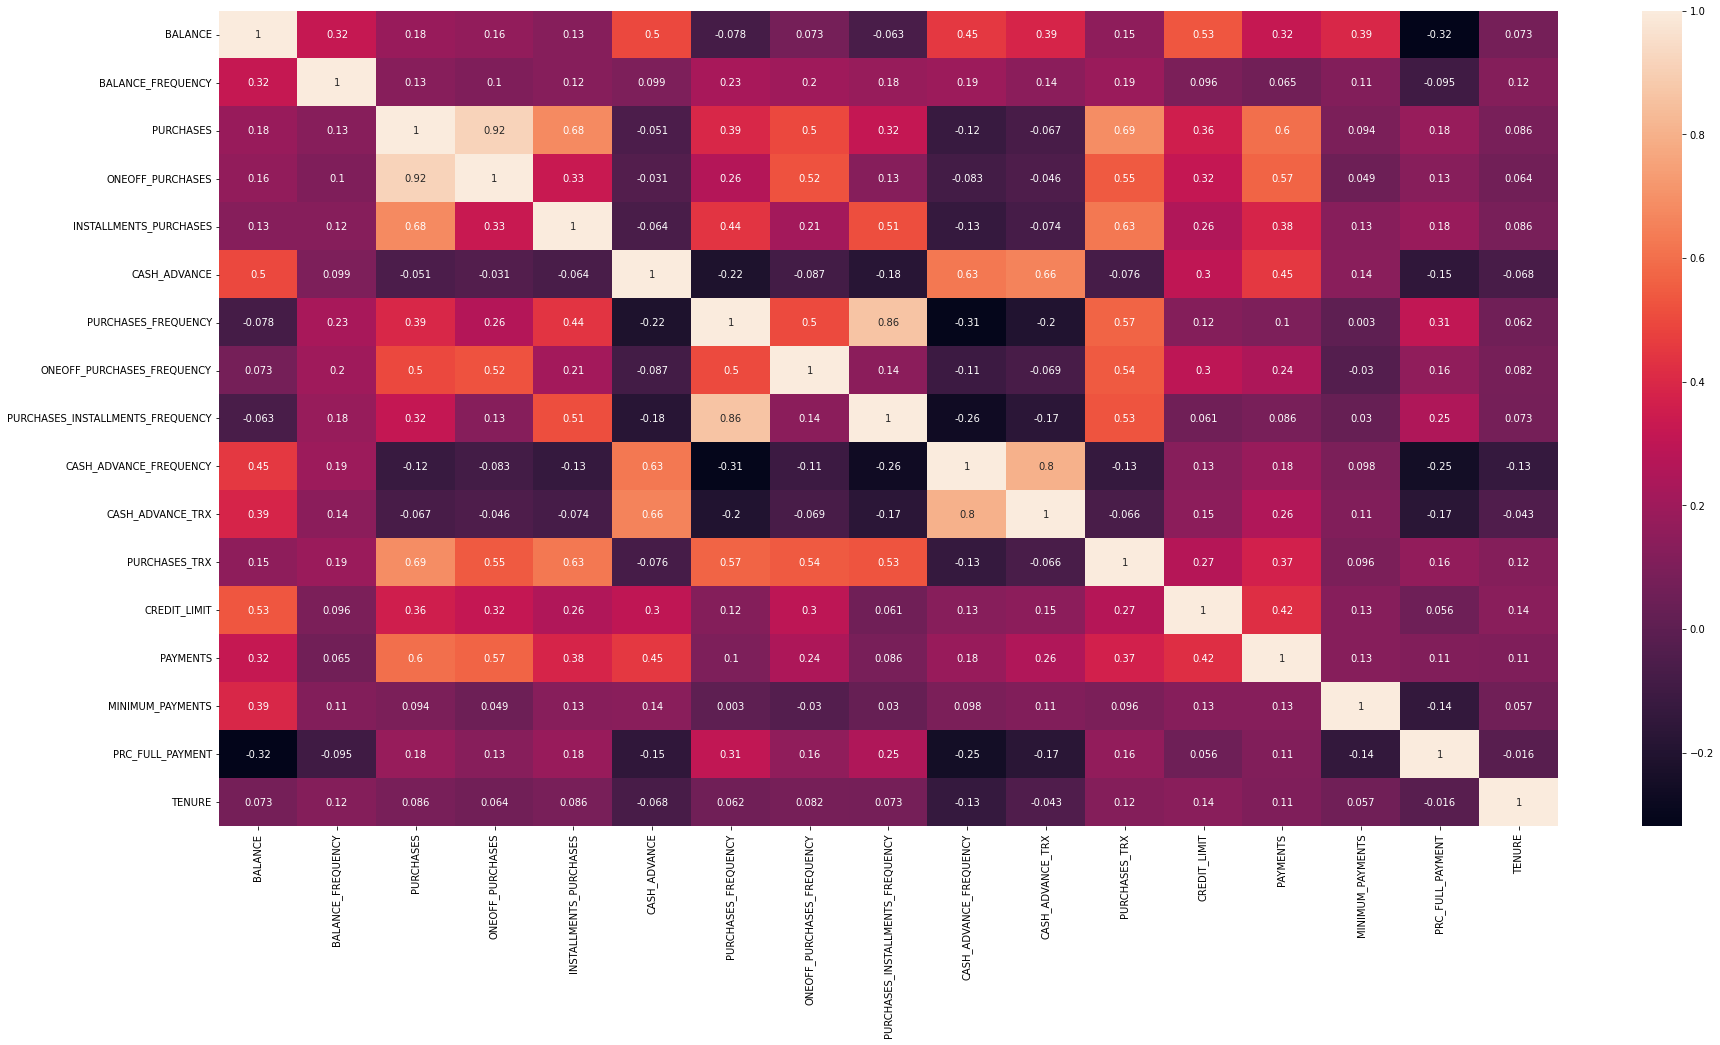

In [ ]:
correlations=ccdata.corr()
plt.figure(figsize=(30,15))
sns.heatmap(correlations,annot=True)

# **scale data and kmeans** 

In [ ]:
standardize = StandardScaler()
cc_data_scal = standardize.fit_transform(ccdata)

Text(0.5, 1.0, 'Elbow Curve')

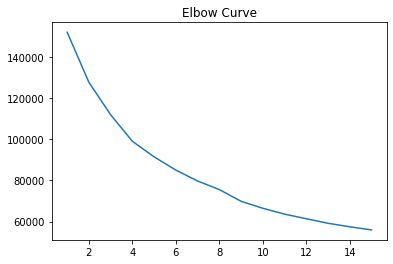

In [ ]:
n_clusters=15
sse=[]
for i in range(1,n_clusters+1):
    kmean= KMeans(i)
    kmean.fit(cc_data_scal)
    sse.append([i, kmean.inertia_])
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1])
plt.title("Elbow Curve")

In [ ]:
kmean= KMeans(7)
kmean.fit(cc_data_scal)

y_kmeans = kmean.predict(cc_data_scal)
ccdata['Cluster_Purchases'] = y_kmeans
ccdata

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster_Purchases
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,3
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6,5
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.000000,6,5
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6,5
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6,5


# **PCA**

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(cc_data_scal)
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': y_kmeans})], axis = 1)
pca_df

,pca1,pca2,cluster
0,-1.682221,-1.076445,4
1,-1.138296,2.506495,2
2,0.969680,-0.383509,6
3,-0.873628,0.043168,4
4,-1.599434,-0.688575,4
...,...,...,...
8945,-0.359629,-2.016148,0
8946,-0.564368,-1.639125,0
8947,-0.926203,-1.810788,0
8948,-2.336550,-0.657971,4


In [ ]:
loadings = pd.DataFrame(
    pca.components_.T, 
    columns=['pca1', 'pca2'],  
    index=ccdata.loc[:, (ccdata.columns != 'Cluster_Purchases') ].columns, 
)
loadings

,pca1,pca2
BALANCE,0.101077,0.403957
BALANCE_FREQUENCY,0.120043,0.130537
PURCHASES,0.411642,0.041038
ONEOFF_PURCHASES,0.346407,0.062872
INSTALLMENTS_PURCHASES,0.336814,-0.018532
CASH_ADVANCE,-0.023343,0.439243
PURCHASES_FREQUENCY,0.321493,-0.190780
ONEOFF_PURCHASES_FREQUENCY,0.294633,-0.017923
PURCHASES_INSTALLMENTS_FREQUENCY,0.274710,-0.178601
CASH_ADVANCE_FREQUENCY,-0.089139,0.434082


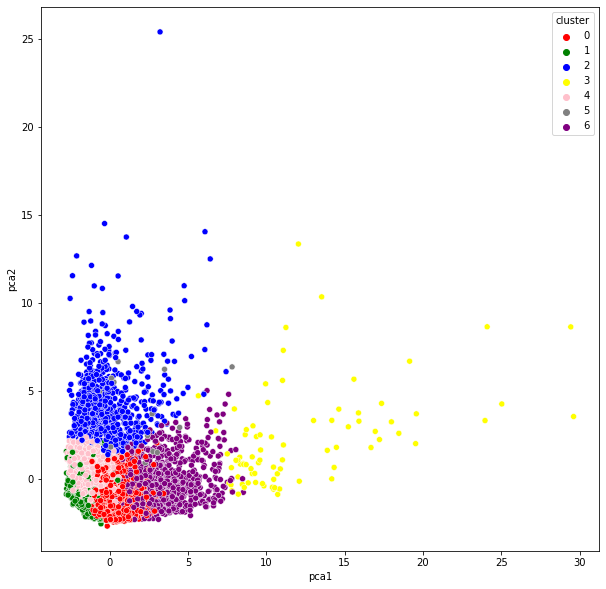

In [ ]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='pca1',y='pca2', hue='cluster', data=pca_df , palette=['red','green','blue','yellow','pink','gray','purple'])

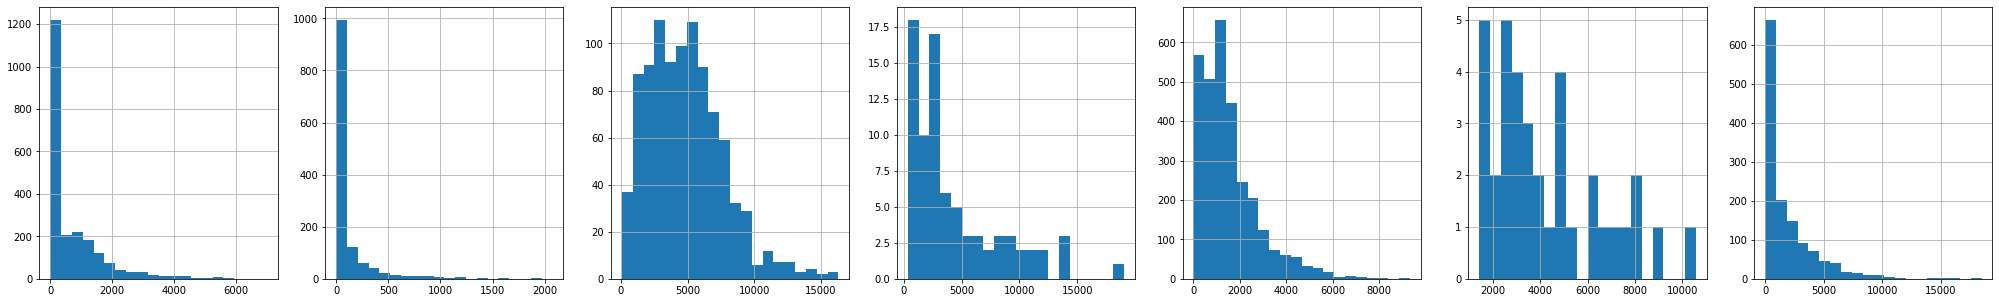

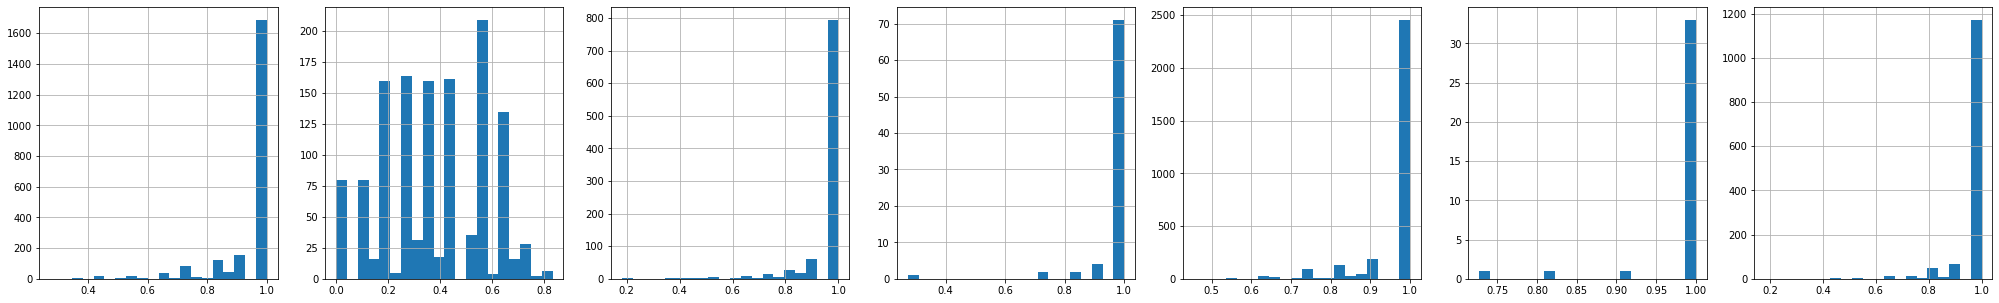

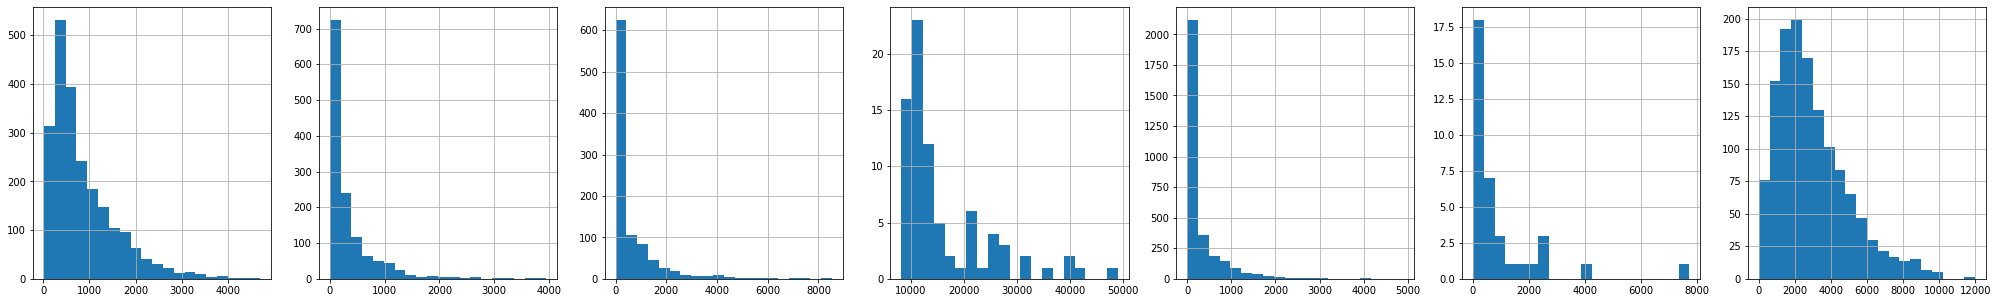

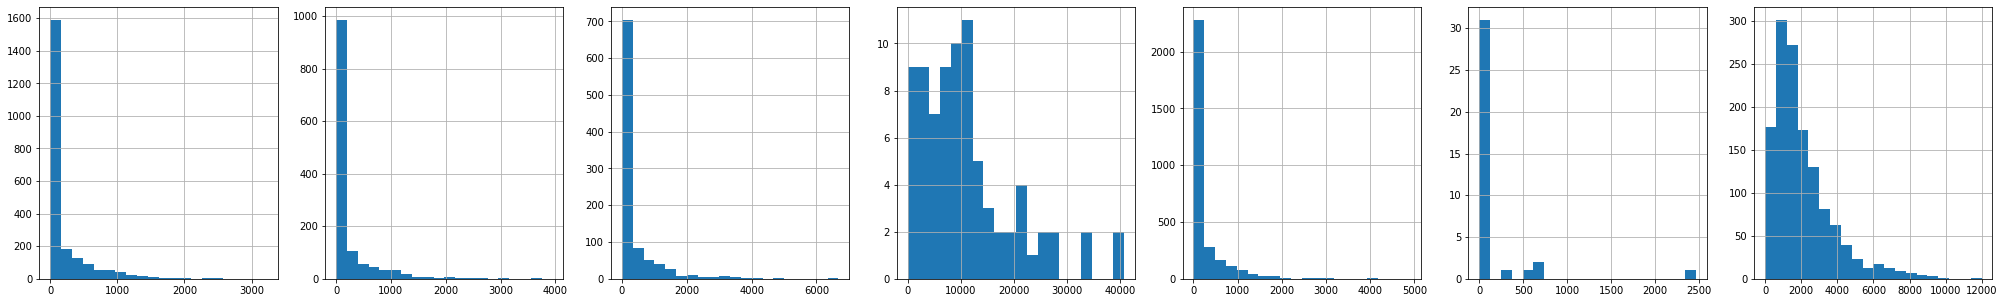

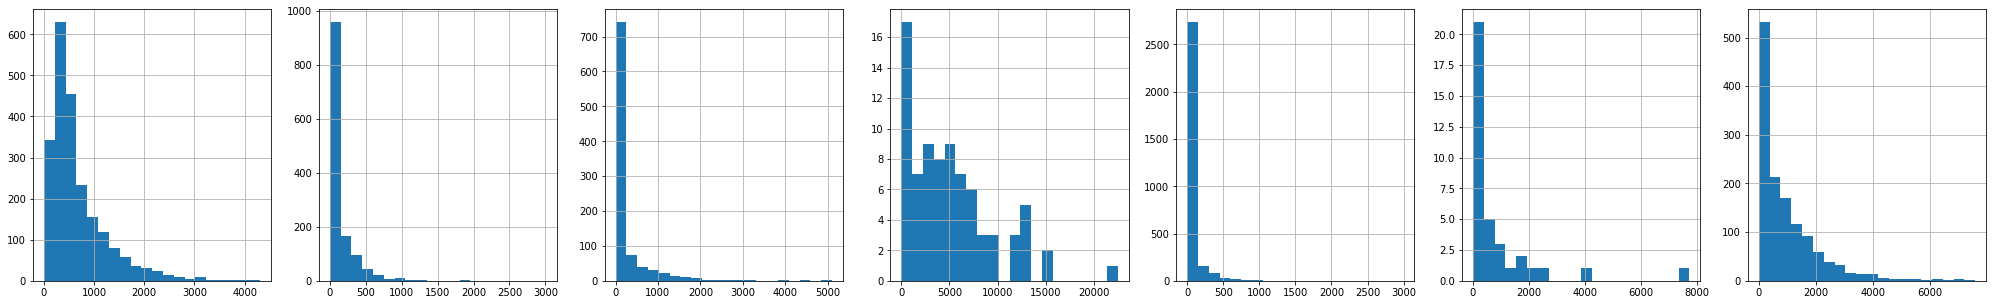

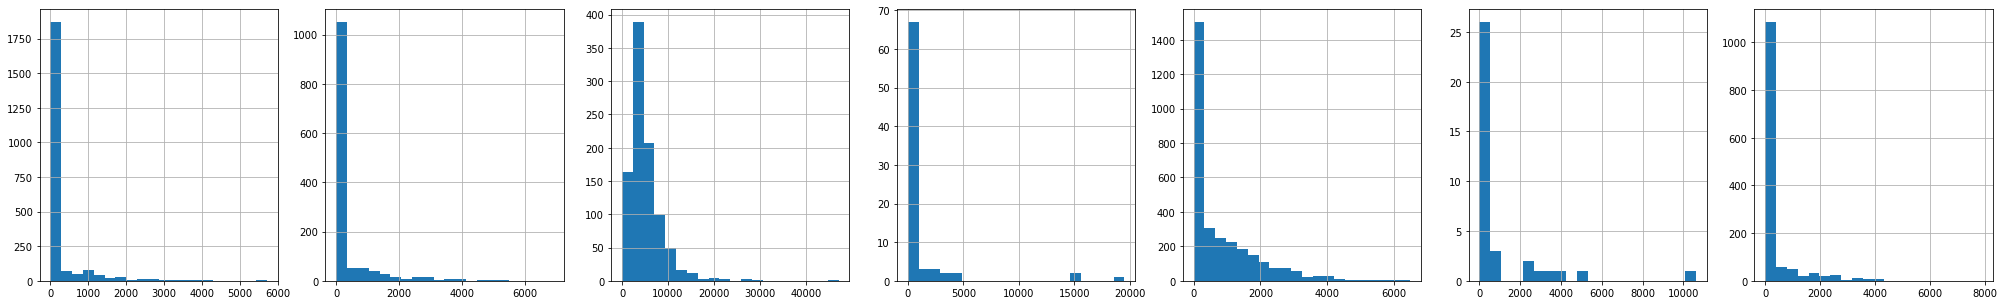

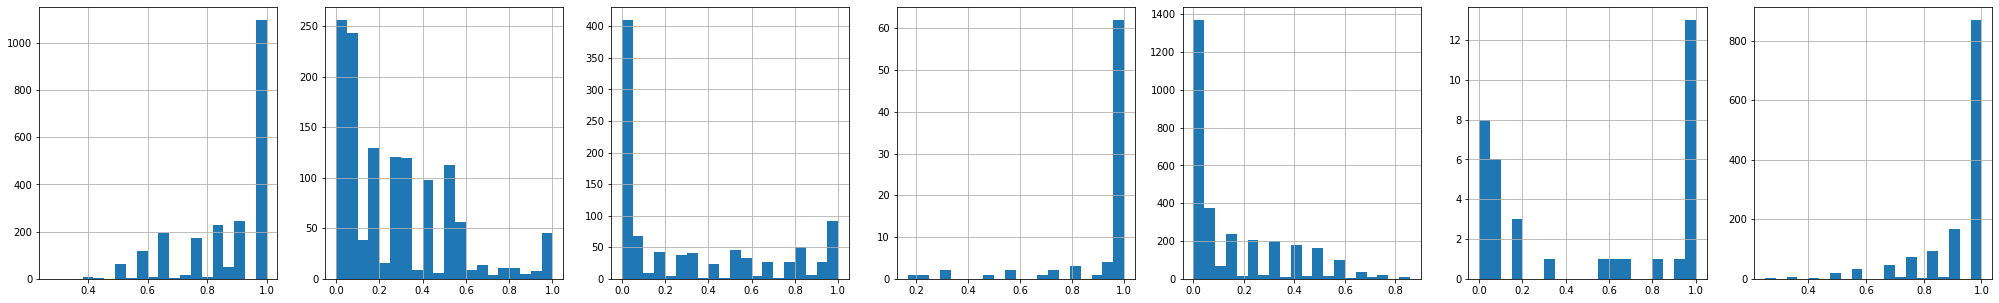

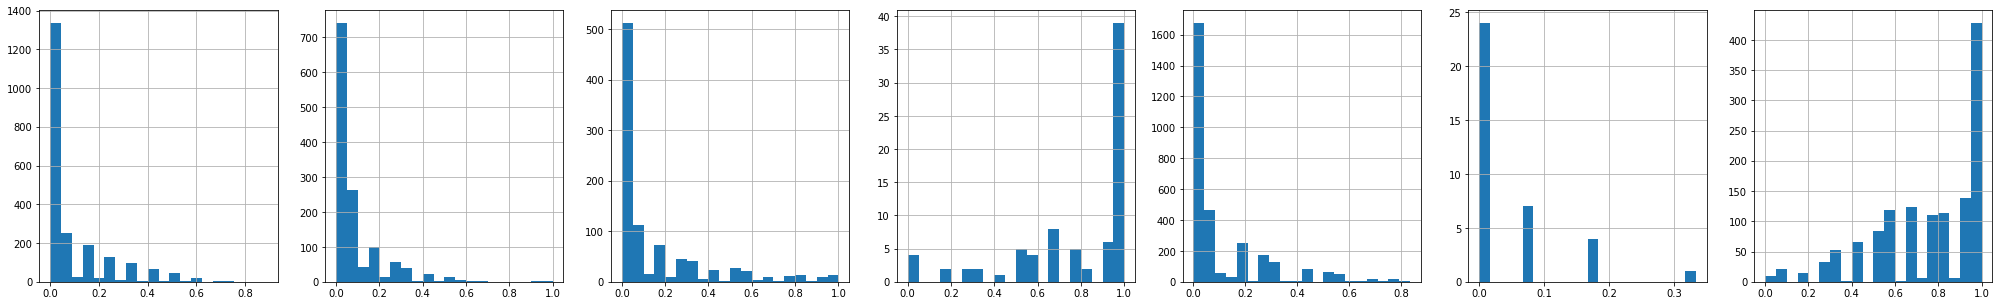

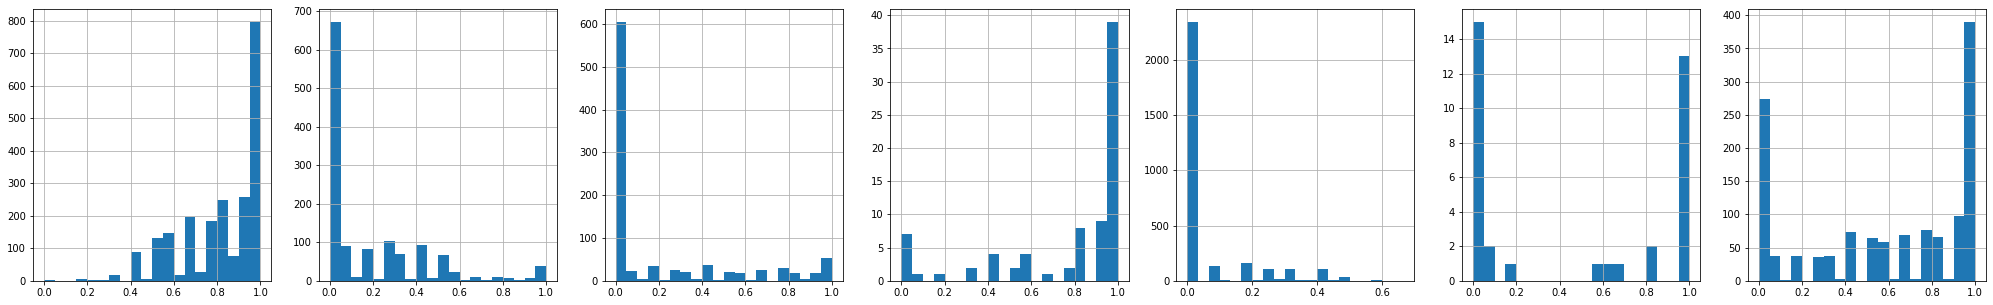

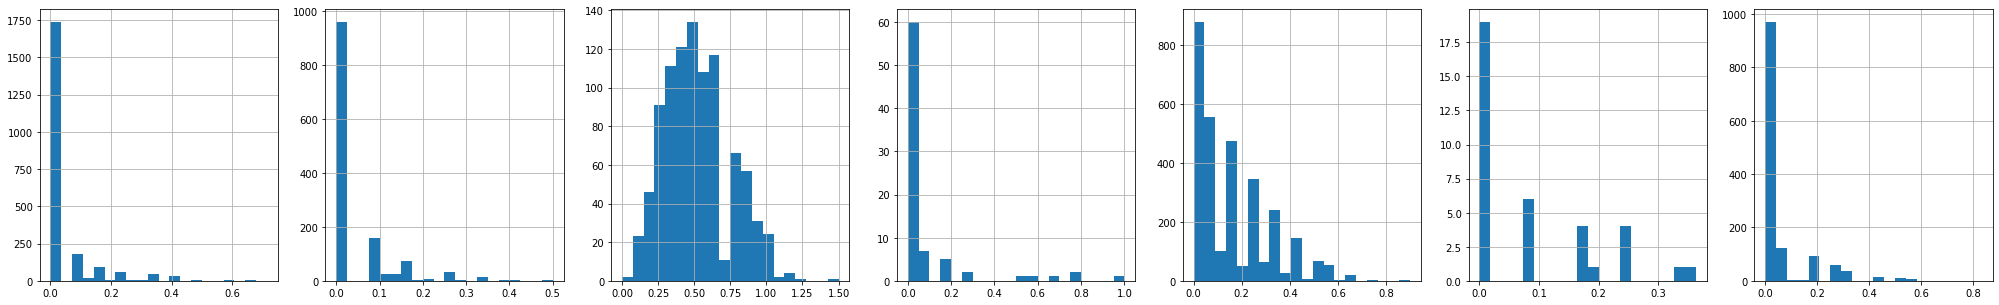

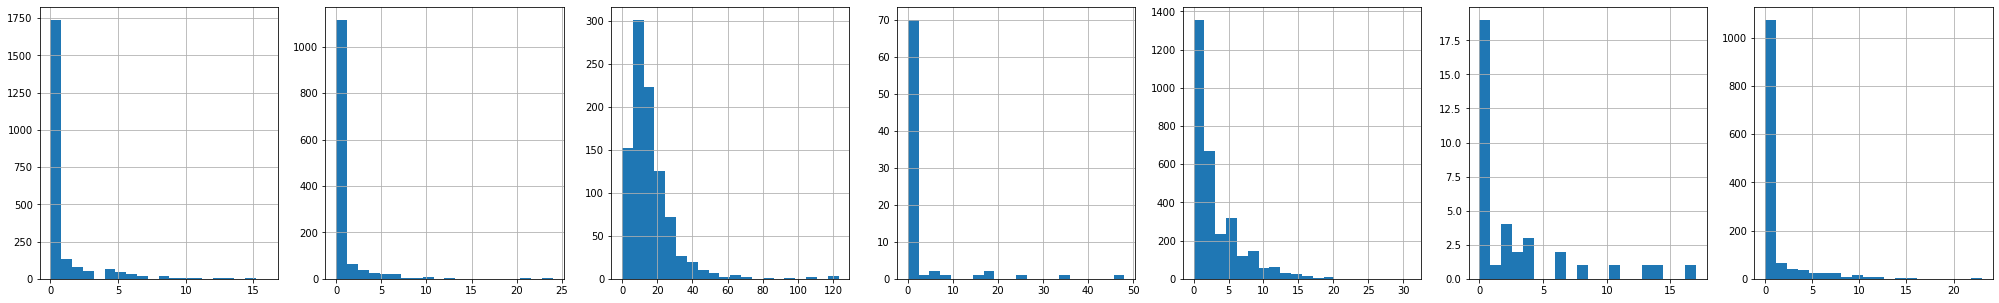

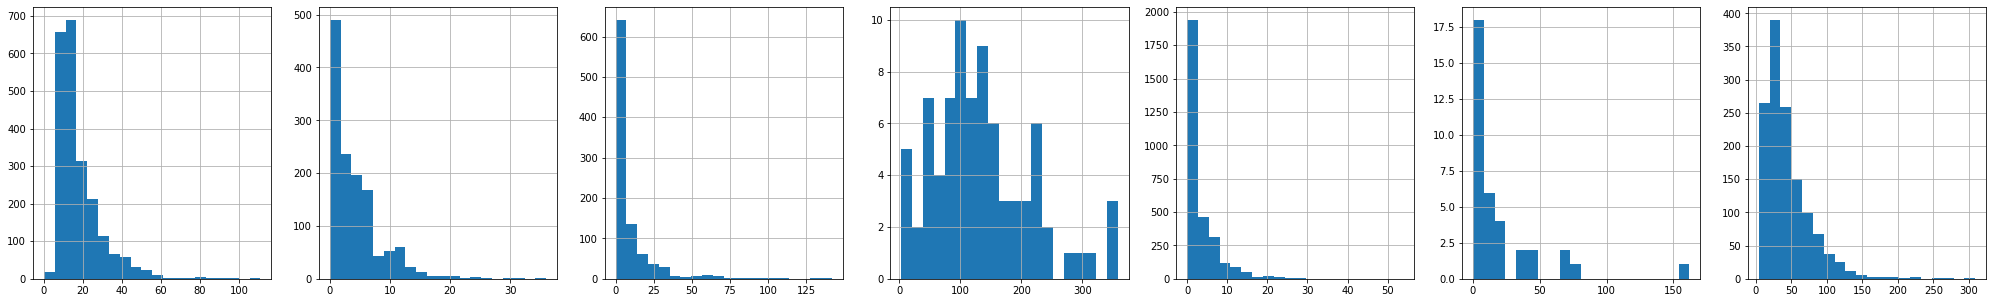

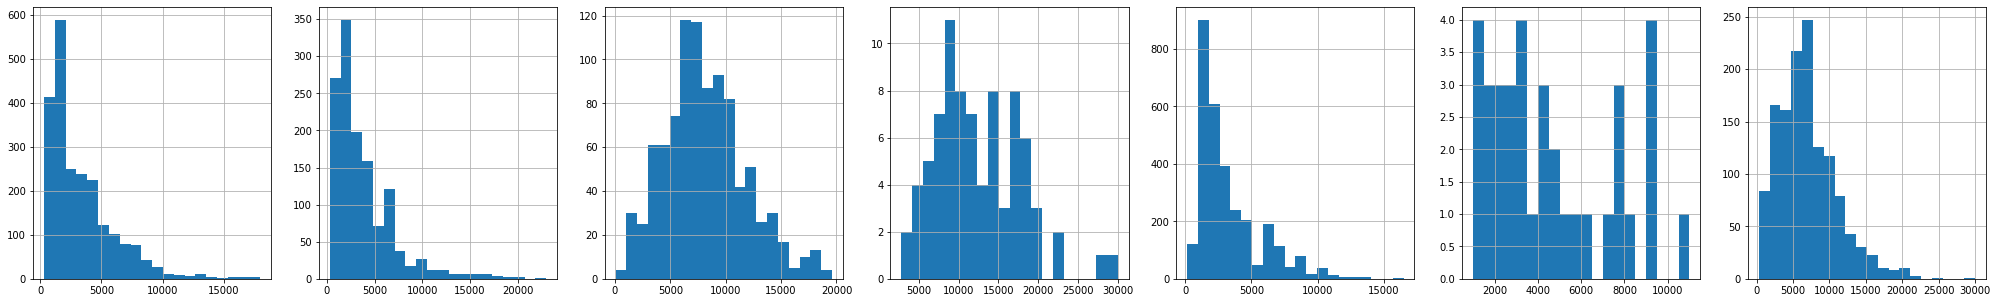

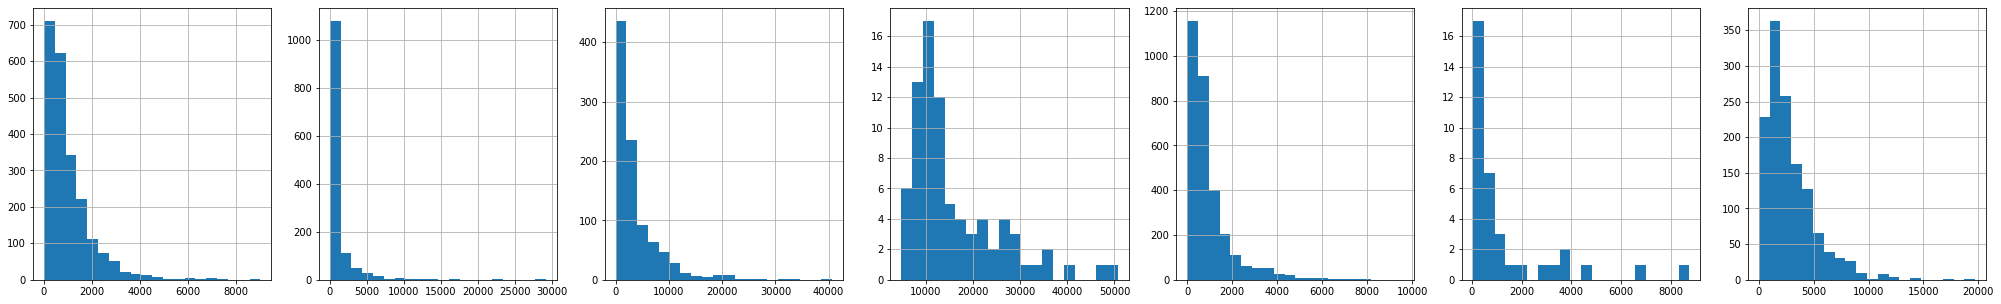

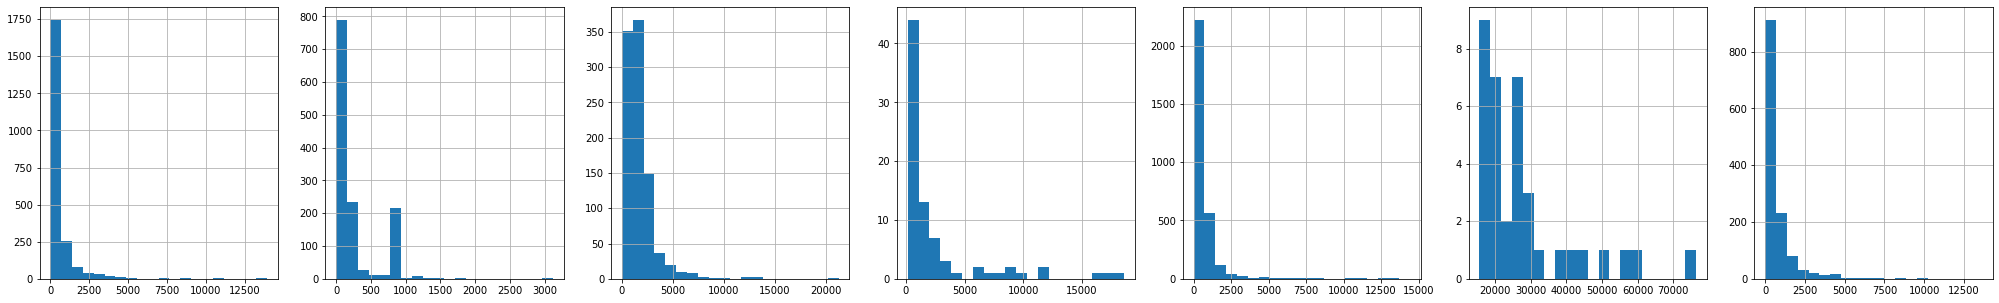

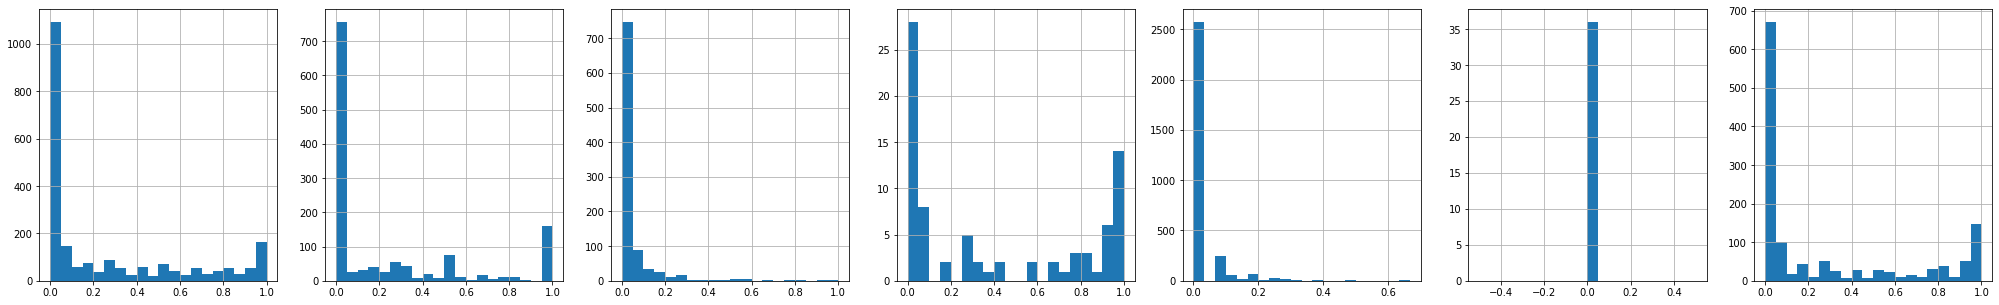

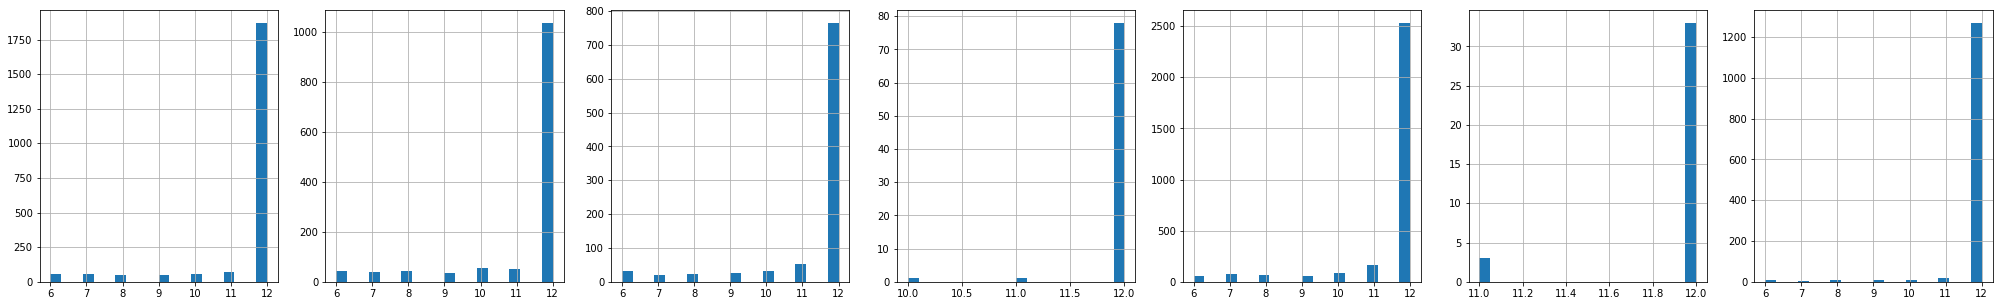

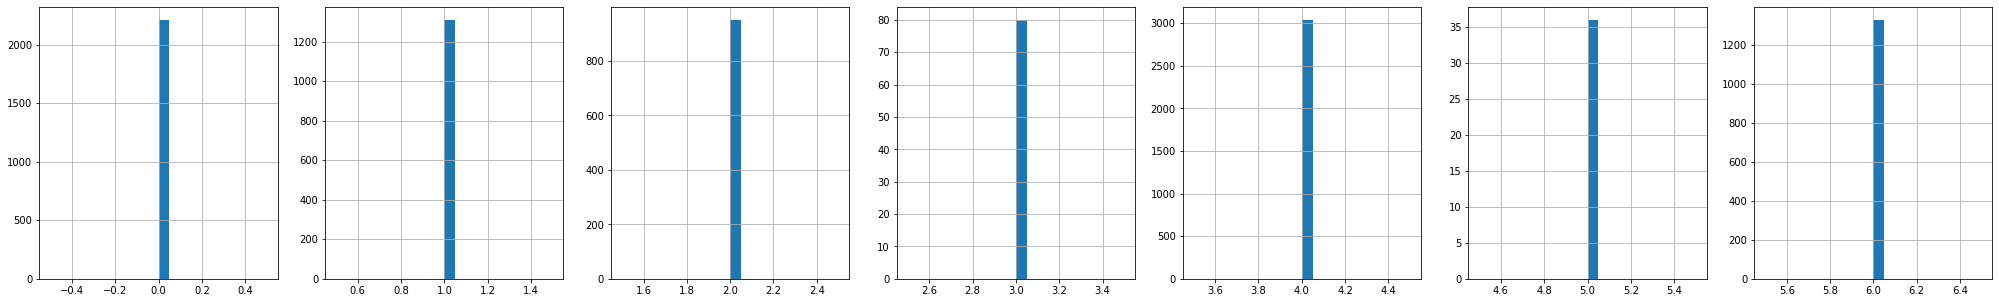

In [ ]:
for i in ccdata.columns:
    plt.figure(figsize=(35,5))
    for j in range(7):
        plt.subplot(1,7,j+1)
        cluster=ccdata[ccdata['Cluster_Purchases']==j]
        cluster[i].hist(bins=20)
        
    plt.show()

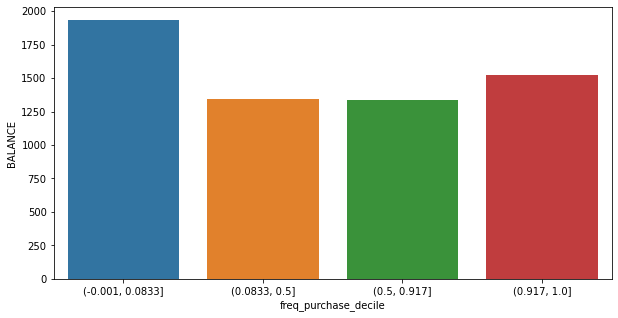

In [ ]:

ccdata['freq_purchase_decile'] = pd.qcut(ccdata['PURCHASES_FREQUENCY'], q=4)

data_pur   = ccdata.groupby('freq_purchase_decile', as_index=False).mean()
fig = plt.figure(figsize=(10,5))
sns.barplot(x= "freq_purchase_decile" , y = "BALANCE", data =data_pur)
plt.show()

#Customers with lesser frequency of purchases have more average Balance compared to customers who have a higher frequency of purchases.

In [ ]:
data_pur

,freq_purchase_decile,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,AVG_PURCHASE_TRX_PRICE,BALANCE_TO_CREDIT_LIMIT
0,"(-0.001, 39.635]",2055.778318,0.866940,2.028119,1.042033,1.024937,1867.728433,0.013005,0.005875,0.006829,0.257120,5.939231,0.154602,4020.270626,1609.940612,1003.594032,0.046491,11.349419,1.617980,0.553570
1,"(39.635, 361.28]",1038.181382,0.799454,186.064797,74.742512,111.819549,645.592482,0.432952,0.086874,0.330114,0.099212,2.392937,5.869468,3479.848011,844.075343,639.916351,0.138057,11.412606,54.219023,0.324083
2,"(361.28, 1110.13]",1209.044850,0.891642,666.662284,317.469481,349.567546,655.031656,0.679994,0.216621,0.492536,0.094277,2.386232,13.404560,4125.254354,1189.393325,775.023708,0.193410,11.544032,94.193519,0.345035
3,"(1110.13, 49039.57]",1954.500783,0.951019,3157.548637,1976.141273,1181.697355,746.838260,0.835509,0.500415,0.628313,0.089934,2.276139,39.406166,6351.806492,3288.525904,1038.152010,0.236912,11.763181,145.452510,0.332798


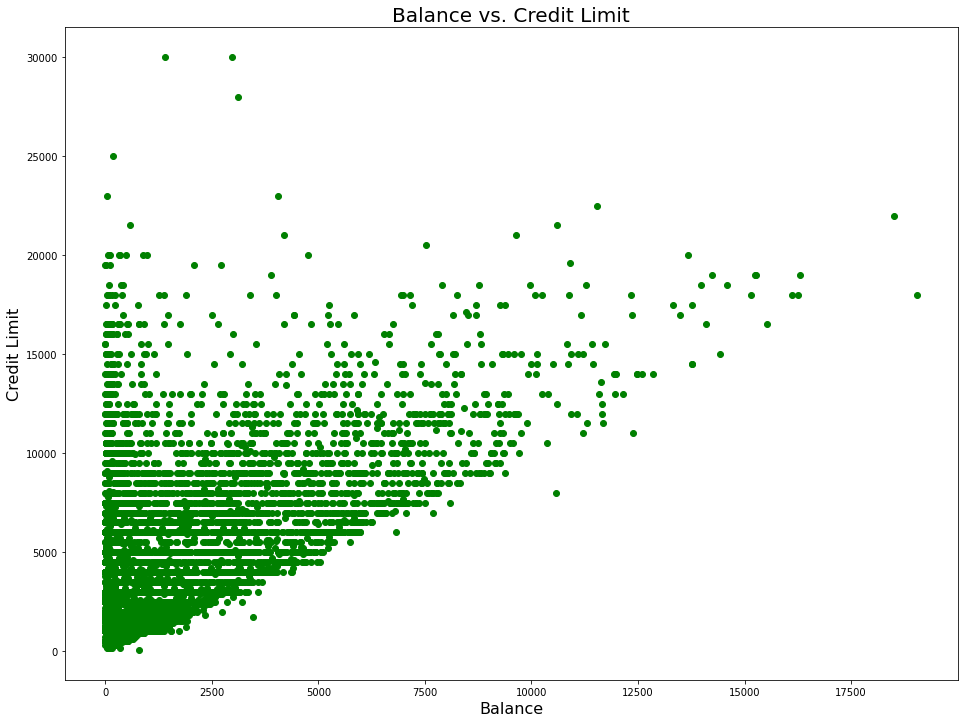

In [ ]:
plt.figure(figsize = (16, 12))
plt.title("Balance vs. Credit Limit", fontsize = 20)
plt.scatter(ccdata["BALANCE"], ccdata["CREDIT_LIMIT"], color = "green")
plt.xlabel("Balance", fontsize = 16)
plt.ylabel("Credit Limit", fontsize = 16)
plt.show()

In [ ]:
ccdata['AVG_PURCHASE_TRX_PRICE'] = ccdata.loc[:,'PURCHASES']/ccdata.loc[:,'PURCHASES_TRX']
ccdata['BALANCE_TO_CREDIT_LIMIT'] = ccdata.loc[:,'BALANCE']/ccdata.loc[:,'CREDIT_LIMIT']


ccdata['AVG_PURCHASE_TRX_PRICE'] = ccdata.AVG_PURCHASE_TRX_PRICE.replace(np.NaN, 0)
ccdata['AVG_PURCHASE_TRX_PRICE'] = ccdata.AVG_PURCHASE_TRX_PRICE.replace(np.inf, 0)


In [ ]:
ccdata.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,freq_purchase_decile,AVG_PURCHASE_TRX_PRICE,BALANCE_TO_CREDIT_LIMIT
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,"(0.0833, 0.5]",47.700000,0.040901
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,"(-0.001, 0.0833]",0.000000,0.457495
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,"(0.917, 1.0]",64.430833,0.332687
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,"(-0.001, 0.0833]",1499.000000,0.222223
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,"(-0.001, 0.0833]",16.000000,0.681429


In [ ]:
kmeans_columns = ['AVG_PURCHASE_TRX_PRICE', 'ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES' , 'BALANCE_TO_CREDIT_LIMIT']
cc_data_kmeans = ccdata.loc[:, kmeans_columns]

standardize = StandardScaler()
cc_data_kmeans = standardize.fit_transform(cc_data_kmeans)

In [ ]:
cc_data_kmeans

array([[-0.16304099, -0.35693402, -0.34907882, -0.89295007],
       [-0.46020768, -0.35693402, -0.45457623,  0.17606346],
       [-0.05880941,  0.10888851, -0.45457623, -0.14420553],
       ...,
       [-0.28028789, -0.35693402, -0.29489252, -0.93786174],
       [-0.46020768, -0.35693402, -0.45457623, -0.92883825],
       [-0.16408382,  0.30173158, -0.45457623, -0.20090671]])

Text(0.5, 1.0, 'Elbow Curve')

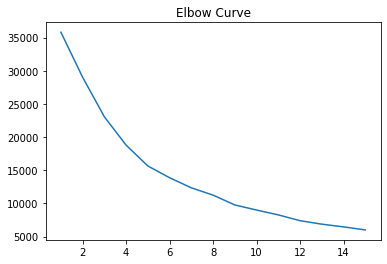

In [ ]:
n_clusters=15
sse=[]
for i in range(1,n_clusters+1):
    kmean= KMeans(i)
    kmean.fit(cc_data_kmeans)
    sse.append([i, kmean.inertia_])
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1])
plt.title("Elbow Curve")

In [ ]:
kmean= KMeans(5)
kmean.fit(cc_data_kmeans)

y_kmeans = kmean.predict(cc_data_kmeans)
ccdata['Cluster_Purchases'] = y_kmeans


In [ ]:
ccdata.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,freq_purchase_decile,AVG_PURCHASE_TRX_PRICE,BALANCE_TO_CREDIT_LIMIT,Cluster,Cluster_Purchases
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,"(39.635, 361.28]",47.700000,0.040901,0,4
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,"(-0.001, 39.635]",0.000000,0.457495,1,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,"(361.28, 1110.13]",64.430833,0.332687,0,4
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,"(1110.13, 49039.57]",1499.000000,0.222223,3,2
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,"(-0.001, 39.635]",16.000000,0.681429,1,0


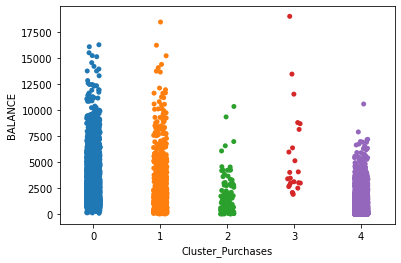

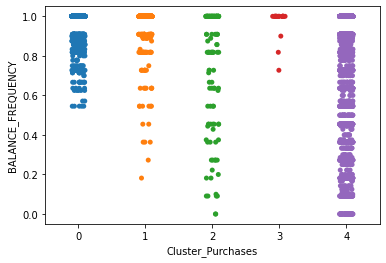

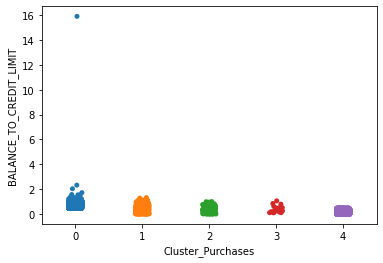

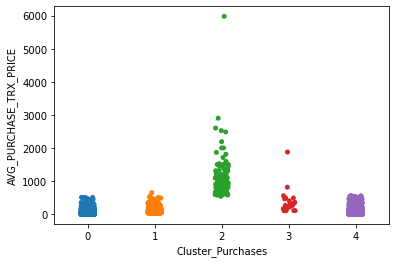

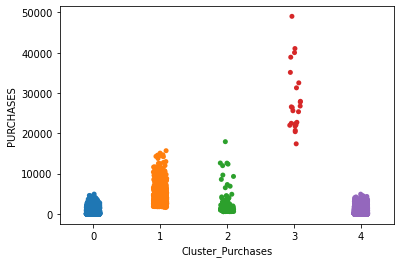

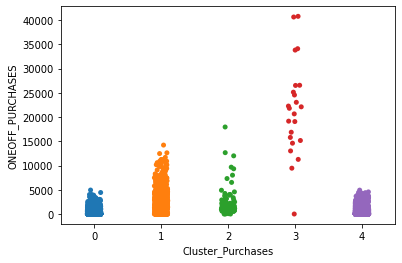

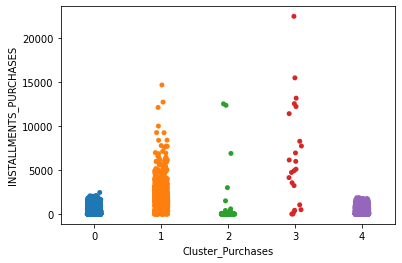

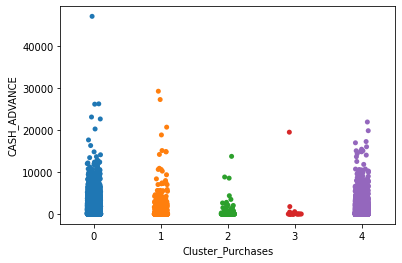

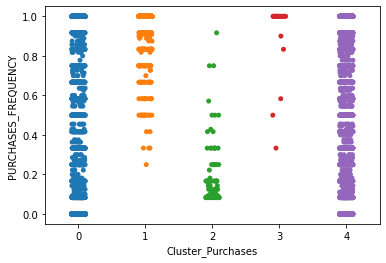

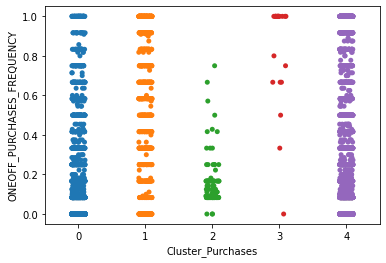

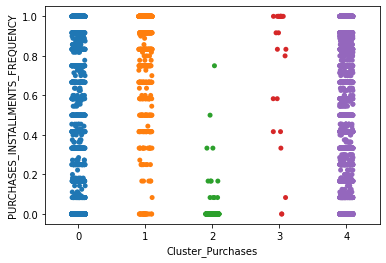

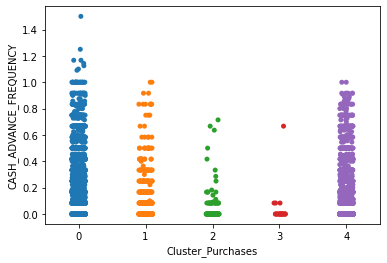

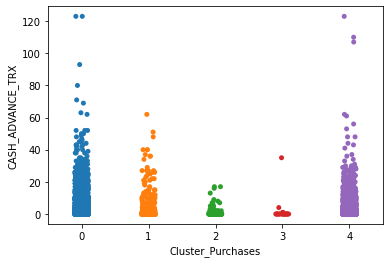

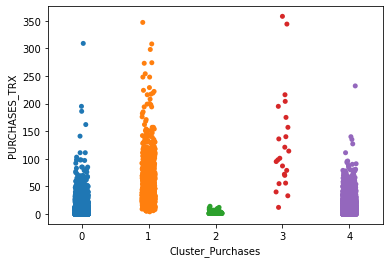

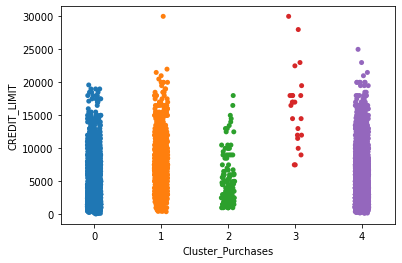

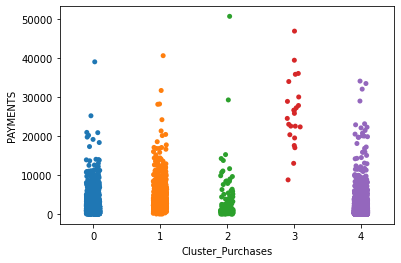

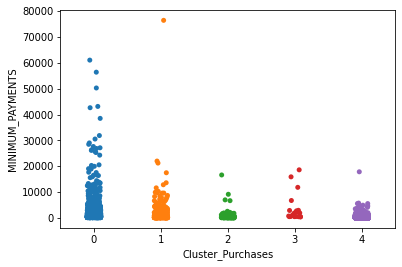

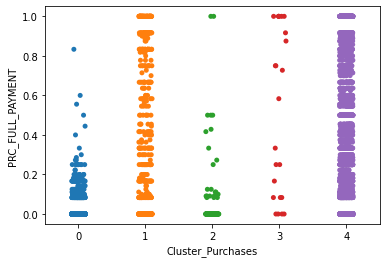

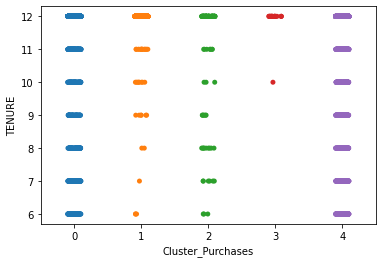

In [ ]:
for i in ['BALANCE', 'BALANCE_FREQUENCY', 'BALANCE_TO_CREDIT_LIMIT','AVG_PURCHASE_TRX_PRICE', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']:
    sns.stripplot(x ='Cluster_Purchases',y=i,data=ccdata)
    plt.show()

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(cc_data_kmeans)
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': y_kmeans})], axis = 1)
pca_df

,pca1,pca2,cluster
0,-0.335751,-0.977585,4
1,-0.742953,0.055934,0
2,-0.184097,-0.191463,4
3,4.631685,-0.939215,2
4,-0.794214,0.606656,0
...,...,...,...
8945,-0.207670,-0.972410,4
8946,-0.193153,-0.994418,4
8947,-0.356238,-1.004608,4
8948,-0.536397,-1.011452,4


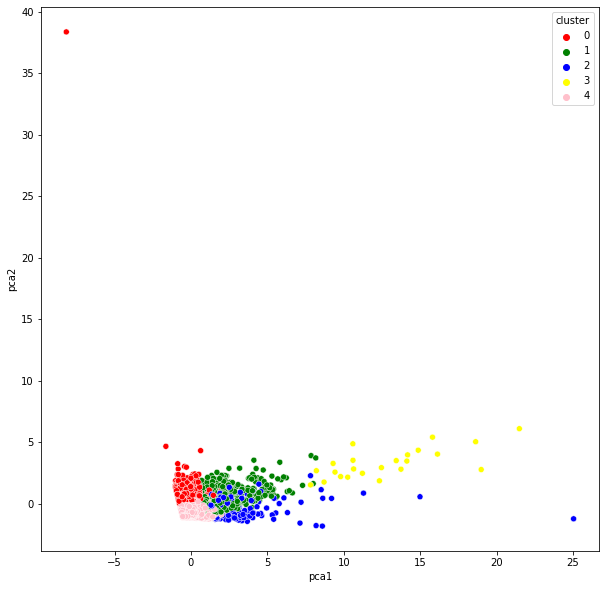

In [ ]:
plt.figure(figsize=(10,10))
ax=sns.scatterplot(x='pca1',y='pca2', hue='cluster', data=pca_df , palette=['red','green','blue','yellow','pink'])